In [ ]:
"""
Examples for plotting and Monte Carlo utilities.

This notebook generates several figures from the PRL paper.
"""
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats

# Add src directory to path for Jupyter notebook to find hyperpopy package
# This adds the src directory (two levels up from examples) to Python path
current_dir = os.getcwd()
src_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))

# Debug: print paths to help troubleshoot
print(f"Current directory: {current_dir}")
print(f"Calculated src directory: {src_dir}")
print(f"src directory exists: {os.path.exists(src_dir)}")
print(f"hyperpopy package exists: {os.path.exists(os.path.join(src_dir, 'hyperpopy'))}")

if src_dir not in sys.path:
    sys.path.insert(0, src_dir)
    print(f"Added to sys.path: {src_dir}")
else:
    print(f"Already in sys.path: {src_dir}")

print(f"sys.path[0:3]: {sys.path[0:3]}")

from hyperpopy.generation_utils import plot_hyperplanes_color_2d  # pylint: disable=wrong-import-position,import-error
from hyperpopy.mc_utils import (  # pylint: disable=wrong-import-position,import-error
    plot_mc_colors_with_errorbars,
    figure_3_helper,
    plot_mc_chord_lengths_with_errorbars,
    monte_carlo_convergence_with_error_bars,
)

set_matplotlib_formats('png', dpi=60)  # smaller default display dpi


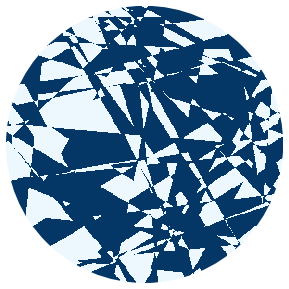

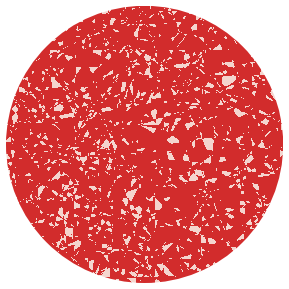

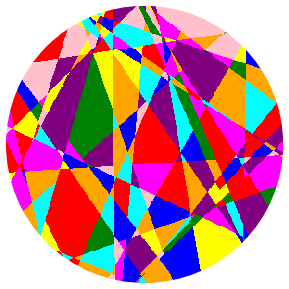

In [5]:
### Figure 1 ###
#generating sample realizations of the Poisson model#

frozen_lake_colors = ['#043765', "#edf8fe"]
meat_colors = ['#d22c2c', '#f4d5ce']
rainbow_colors = [
    'red', 'blue', 'green', 'purple', 'orange',
    'yellow', 'pink', 'cyan', 'magenta', 'navy',
]

RES = 300 #resolution of the Poisson model grid

RAD = 20 #radius of the Poisson model grid
CUTOFF = 0.65 #cutoffs determine the values at which a random number
#between 0 and 1 is assigned to a color. For example, if cutoffs = [.2,.7]
#then there are three colors, with color 0 having a 20% chance, color 1
#having a 50% chance, and color 3 having a 30% chance.

fig1 = plot_hyperplanes_color_2d( #frozen lake-like Poisson model
    RAD,
    RES,
    colorcutoffs=np.array([CUTOFF]),
    cmap_list=frozen_lake_colors,
    preview_dpi=100,
)

RAD = 75
CUTOFF = 0.87
fig2 = plot_hyperplanes_color_2d( #meat-like Poisson model
    RAD,
    RES,
    colorcutoffs=np.array([CUTOFF]),
    cmap_list=meat_colors,
    preview_dpi=100,
)

RAD = 10
cutoffs = np.linspace(0.1, 1, 9)
fig3 = plot_hyperplanes_color_2d( #rainbow-colored Poisson model
    RAD,
    RES,
    colorcutoffs=cutoffs,
    cmap_list=rainbow_colors,
    preview_dpi=100,
)

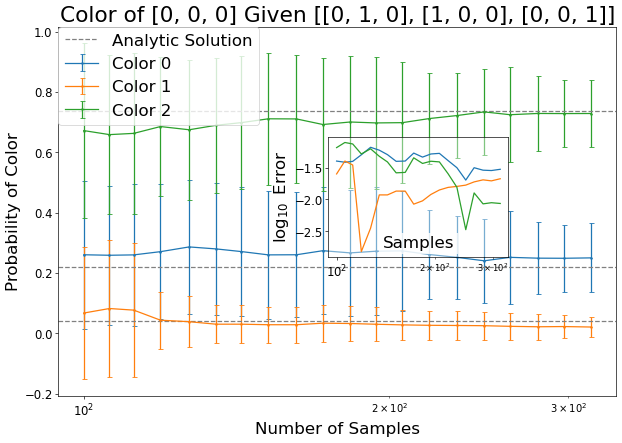

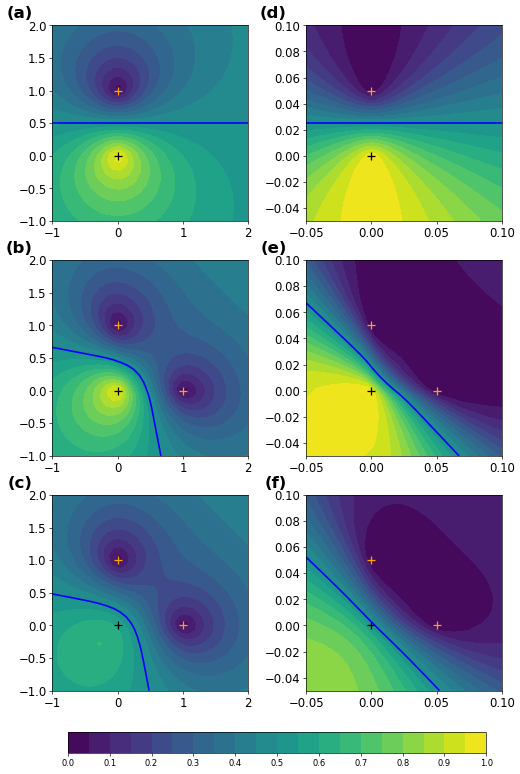

In [ ]:
### Figure 2 ###
#Comparison of analytic CPF to Monte Carlo estimate of CPF

gridpoints = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 0, 0]])
D = 3
MAX_SAMPLES_POWER = 2.5
samples_array = np.logspace(2, MAX_SAMPLES_POWER, 20, dtype=int)
NUM_MONTE_CARLO_RUNS = 20
color_dist = (0.1, 0.1, 0.8) #probability of color 0 = .1, color 2 = .8
colors = (0, 2, 2) #known colors of the first three points

fig, ax, probs_mean, probs_std = plot_mc_colors_with_errorbars(
    D,
    gridpoints,
    color_dist,
    colors,
    samples_array,
    NUM_MONTE_CARLO_RUNS,
    analytic_probs=True,
)

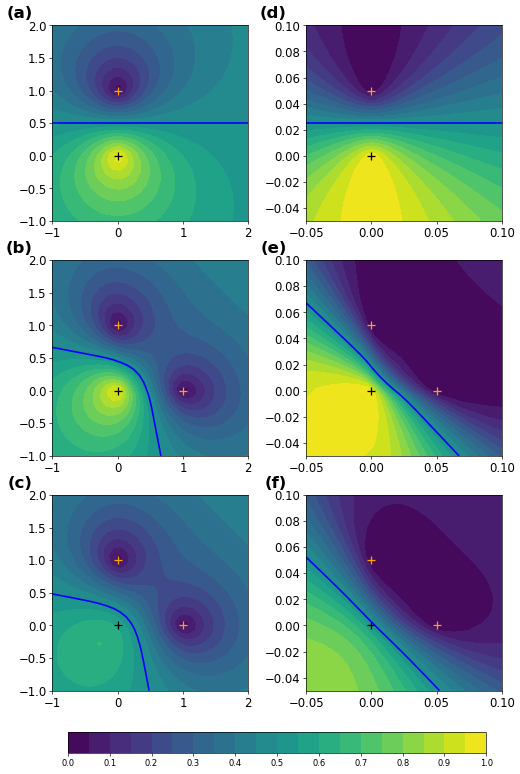

In [7]:
### Figure 3 ###
#Several different plots of CPF conditioned on two and three points
figure_3_helper(color_dist=(0.5, 0.5), grid_resolution=30)

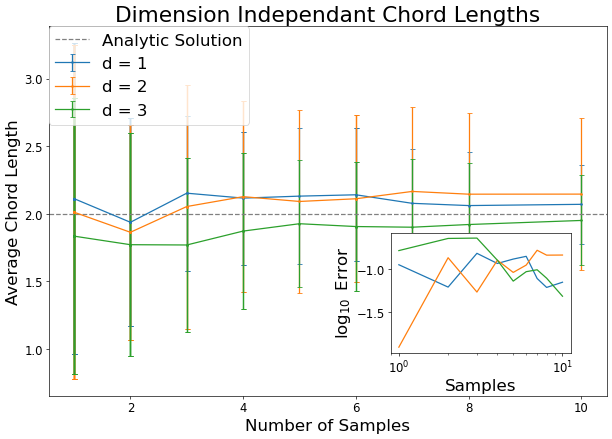

In [8]:
### Supplement Figure 1 ###
#confirming that chord lengths are distributed as expected

R = 16  # Gives accuracy within e^-r
RESOLUTION = 400
color_dist = (0.5, 0.5)
MAX_SAMPLES_POWER = 1
samples_array = np.logspace(0, MAX_SAMPLES_POWER, 20, dtype=int)
NUM_MONTE_CARLO_RUNS = 20

# Main plotting function
fig, ax, chord_lengths_mean, stdev = plot_mc_chord_lengths_with_errorbars(
    R,
    RESOLUTION,
    color_dist,
    samples_array,
    NUM_MONTE_CARLO_RUNS,
)

# Calculate analytic solution
ANALYTIC_SOLUTION = 0
for color_prob in color_dist:
    ANALYTIC_SOLUTION += color_prob / (1 - color_prob)

# Calculate log differences for the inset
log_differences = np.log10(np.abs(ANALYTIC_SOLUTION - chord_lengths_mean))

# Add inset axis
inset_ax = fig.add_axes([
    0.6,
    0.2,
    0.25,
    0.25,
])  # [left, bottom, width, height] in normalized figure coords
for d in (1, 2, 3):
    inset_ax.plot(samples_array, log_differences[d - 1], label=f'd={d}')

inset_ax.set_xscale('log')
inset_ax.set_xlabel('Samples', fontsize=20)
inset_ax.set_ylabel(r'$\log_{10}$ Error', fontsize=20)
inset_ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

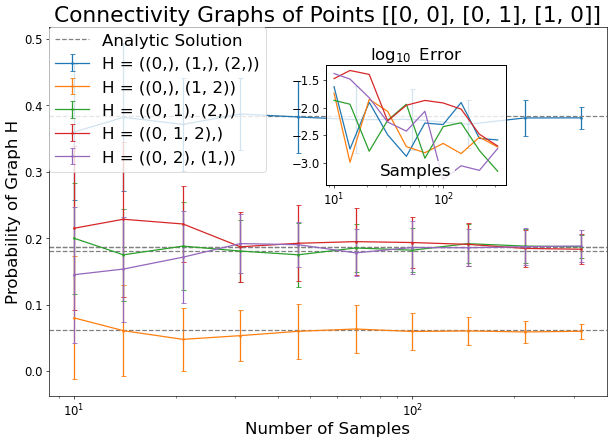

In [9]:
### Supplement Figure 3 ###
# comparing analytic P(connectivity graph) to monte carlo estimate

D = 2
gridpoints = np.array([[0, 0], [0, 1], [1, 0]])
MAX_SAMPLES_POWER = 2.5
samples_array = np.logspace(1, MAX_SAMPLES_POWER, 10, dtype=int)
NUM_MONTE_CARLO_RUNS = 20

#calculate analytic probabilities "by hand"
none_connected = (
    (1 - np.e ** (-1 + 1 / np.sqrt(2)))
    * (2 - 2 * np.e ** (-1 / np.sqrt(2)) - (1 - np.e ** (-1 / np.sqrt(2))) ** 2)
    + (1 - np.e ** (-1 / np.sqrt(2))) ** 2 * (np.e ** (-1 + 1 / np.sqrt(2)))
)
all_connected = (np.e ** (-1 / np.sqrt(2))) / np.e
Bslash = (1 - np.e ** (-(1 - 1 / np.sqrt(2)))) / (np.e ** np.sqrt(2))  # B is the 0,0,0 point
# A refers to either of the two symmetric points 0,1,0 or 1,0,0
Aslash = (1 - np.e ** (-1 / np.sqrt(2))) / np.e
Cslash = Aslash

analytic_probs = {
    ((0,), (1,), (2,)): none_connected,
    ((0, 1, 2),): all_connected,
    ((0, 1), (2,)): Aslash,
    ((0, 2), (1,)): Cslash,
    ((0,), (1, 2)): Bslash,
}


# Call the wrapper function
fig, ax, probs_mean, probs_std = monte_carlo_convergence_with_error_bars(
    D,
    gridpoints=gridpoints,
    samples_array=samples_array,
    num_runs=NUM_MONTE_CARLO_RUNS,
    analytic_probs=analytic_probs,
)